# BioMED - Microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224

In [4]:
#%pip install transformers torch

In [2]:
import torch
import open_clip
from PIL import Image

## Initialize BioMED

In [3]:
model, preprocess, _ = open_clip.create_model_and_transforms("hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224")
tokenizer = open_clip.get_tokenizer("hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224")

In [4]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print("Device:", device)

model.to(device)
model.eval()

Device: cuda


CustomTextCLIP(
  (visual): TimmModel(
    (trunk): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=768, out_features=768, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=768

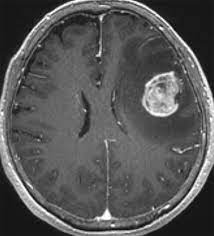

In [5]:
img_path = "../data/master_data/brain_xray.jpeg"
Image.open(img_path)

In [6]:
images = torch.stack([preprocess(Image.open(img_path))]).to(device)

In [7]:
# create dense vectors from the image URI
dense_embeds = model.encode_image(images)
dense_embeds[0]

tensor([-3.2848e+00, -2.0999e-01, -1.7826e+01, -5.8331e+00, -4.7326e+00,
        -4.9957e+00,  1.7424e+00, -2.5160e+00, -4.7561e+00, -3.9410e+00,
         4.3338e+00,  4.2734e+00, -1.5699e+00,  6.1416e+00,  2.4062e+00,
        -1.0631e+00, -1.2504e+00,  1.0184e+00, -2.0973e+00,  2.7452e+00,
         3.7381e+00, -6.4234e-01,  5.1909e+00, -2.0255e-01,  3.5743e+00,
        -2.1195e+00, -4.6927e+00,  4.1346e+00,  2.7669e+00, -3.1111e+00,
         1.0189e+00,  1.8664e+00,  5.1351e+00, -1.7291e+00, -4.1045e+00,
        -3.3691e+00,  1.9653e+00,  1.6666e+00, -4.4137e+00, -2.9409e+00,
         1.7641e-01,  1.5317e+00, -6.2278e-01,  5.8681e+00,  3.1952e+00,
         2.6568e+00, -1.2350e+00, -1.6077e+00, -1.7940e+00,  4.8459e-01,
        -3.5212e+00,  1.8716e+00,  2.3538e+00,  9.3123e-01, -3.3463e+00,
        -2.7522e+00,  1.7166e+00,  5.5092e+00,  1.4050e+00, -2.2857e+00,
         6.6258e-02, -5.2052e+00,  7.5865e-01,  2.4138e+00, -4.7179e+00,
         2.3780e+00,  1.7125e+00, -1.5779e+00,  5.8

In [7]:
# from transformers import T5Tokenizer, T5ForConditionalGeneration

# # Load the T5 model for text generation 
# t5_model_name = "t5-base" 
# t5_tokenizer = T5Tokenizer.from_pretrained(t5_model_name) 
# t5_model = T5ForConditionalGeneration.from_pretrained(t5_model_name)

# # Convert image embeddings to text using T5
# def generate_text_from_embeddings(embeddings):
#     # Create a placeholder input text for T5
#     input_text = "describe the medical image"

#     # Tokenize the input text
#     input_ids = t5_tokenizer(input_text, return_tensors="pt").input_ids

#     # Decode embeddings to text using T5
#     outputs = t5_model.generate(input_ids=input_ids, encoder_outputs=embeddings)
#     decoded_text = t5_tokenizer.decode(outputs[0], skip_special_tokens=True)

#     return decoded_text

# Generate text description
# description = generate_text_from_embeddings(dense_embeds)
# print("Description:", description)

## Store it in FAISS

In [ ]:
#%pip install -qU langchain-community faiss-cpu

In [17]:
import numpy as np
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS

In [10]:
dense_embeds.shape

torch.Size([1, 512])

In [11]:
index = faiss.IndexFlatL2(dense_embeds.shape[1])
index.add(dense_embeds.cpu().detach().numpy())

In [16]:
# save the index to disk
faiss.write_index(index, '../models/faiss_index.index')

## read the index from the file
# index = faiss.read_index('faiss_index.index')

In [24]:
query_embedding = np.random.rand(1, 512).astype('float32')
query_embedding

array([[0.40882295, 0.79292387, 0.3924581 , 0.8609635 , 0.87796664,
        0.39857405, 0.47700986, 0.0348325 , 0.2815434 , 0.6416413 ,
        0.24769177, 0.8171462 , 0.8324712 , 0.83375794, 0.43739408,
        0.25634515, 0.9801168 , 0.12178578, 0.36895382, 0.5237079 ,
        0.81389666, 0.5329871 , 0.8269115 , 0.4767614 , 0.68921155,
        0.46526477, 0.33630446, 0.2766157 , 0.6703347 , 0.28533685,
        0.02883898, 0.11830822, 0.0550731 , 0.8476974 , 0.10851236,
        0.04762236, 0.77228045, 0.51134133, 0.4769027 , 0.15587296,
        0.20655951, 0.40634713, 0.5151349 , 0.52445674, 0.0109659 ,
        0.73094887, 0.57961965, 0.9624492 , 0.41349694, 0.934204  ,
        0.12566474, 0.32540694, 0.20663525, 0.57490593, 0.2916093 ,
        0.42820904, 0.8071754 , 0.7225927 , 0.794075  , 0.08247029,
        0.05464531, 0.8350464 , 0.752892  , 0.9998666 , 0.10477458,
        0.46412972, 0.01059218, 0.44221482, 0.19473848, 0.6663897 ,
        0.17816532, 0.66504073, 0.33413604, 0.86

In [27]:
# k is the number of nearest neighbors
D, I = index.search(query_embedding, k=5)
print(D, I)

[[7.6024062e+03 3.4028235e+38 3.4028235e+38 3.4028235e+38 3.4028235e+38]] [[ 0 -1 -1 -1 -1]]
